# Cell type specific view of the gene of interest

In [10]:
from gene_report import cell_pipeline as cp
from importlib import reload
reload(cp)
adata = cp.get_adata()

In [3]:
# set your gene of interest (GOI)
GOI = "CASP8"

# set your cell type of interest (cell_type)
cell_type = 'T Cell'

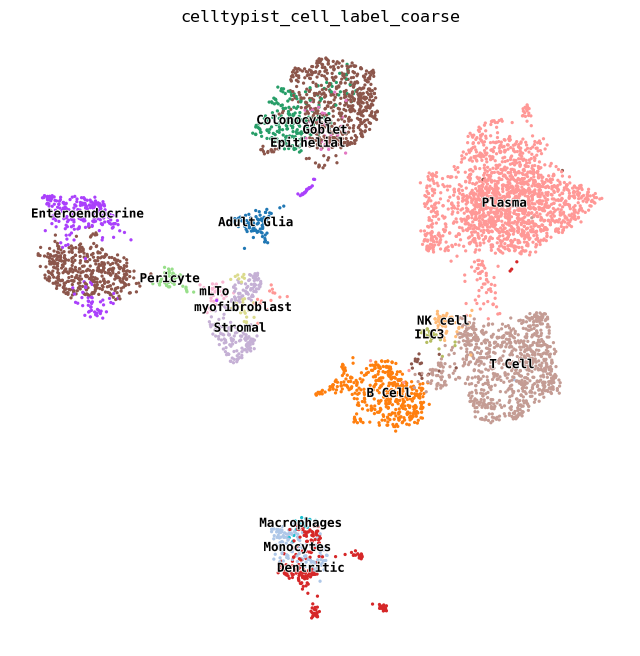

In [5]:
# UMAP of coarse cell types
cp.plot_umap()

In [31]:
expr_sum = cp.explain_expr_celltypes(GOI)
expr_sum

,Cell type,Expression class,Avg. expression over cell type
index,,,
CASP8,mLTo,very low,0.034
CASP8,Monocytes,very low,0.171
CASP8,B Cell,very low,0.221
CASP8,Epithelial,very low,0.135
CASP8,T Cell,low,0.399
CASP8,Dentritic,very low,0.162
CASP8,Plasma,very low,0.184
CASP8,Enteroendocrine,very low,0.163
CASP8,Colonocyte,very low,0.120


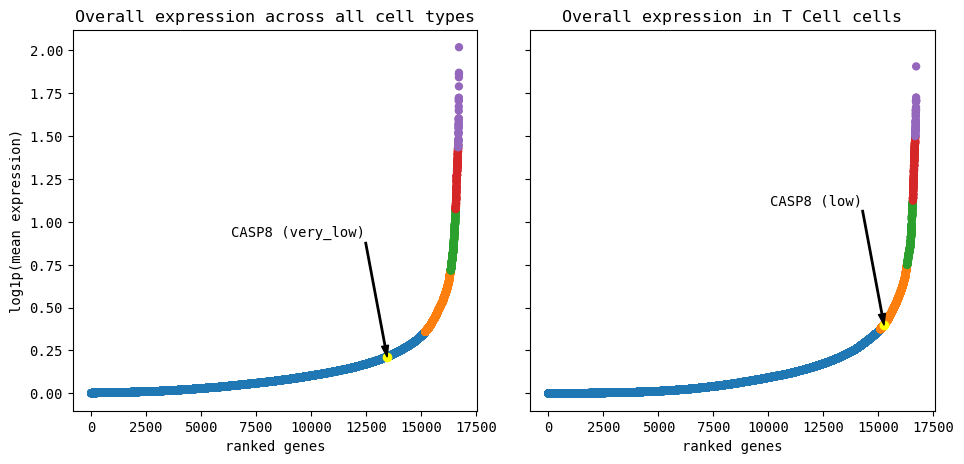

In [64]:
cp.plot_expressions(GOI, cell_type, show_summary=False)
# Can change show_summary to True to show the summary of the expression classes (quantile thresholds and cell counts per category)

In [14]:
plt.rcParams["font.size"] = 11

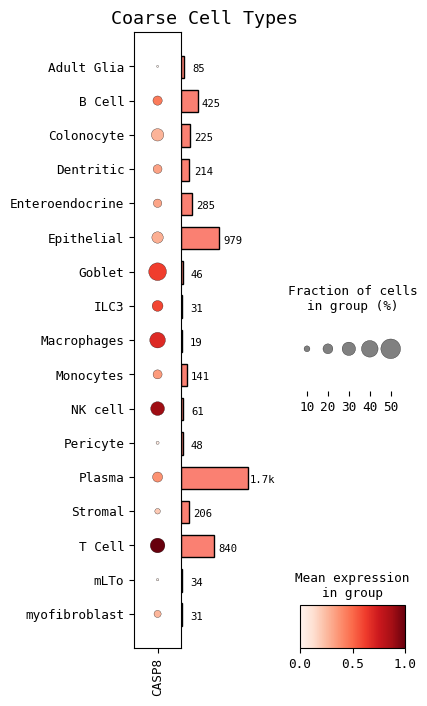

In [15]:
# find expression across cell types of GOI here

markers= GOI
ax1 = sc.pl.dotplot(adata, var_names=markers, groupby='celltypist_cell_label_coarse', 
                    return_fig=True, standard_scale='var', title="Coarse Cell Types", figsize=(3.5,8))
ax1.add_totals().show()

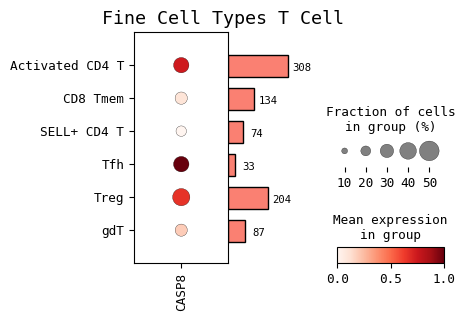

In [16]:
# TODO: make interactive: click on cell type to see fine cell types

ax1 = sc.pl.dotplot(adata[adata.obs['celltypist_cell_label_coarse'] == cell_type], var_names=markers, groupby='celltypist_cell_label', 
                    return_fig=True, standard_scale='var', title=str('Fine Cell Types ' + cell_type), figsize=(4,3))
ax1.add_totals().show()

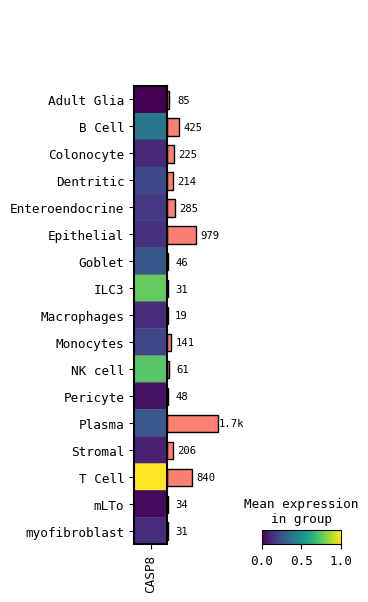

In [17]:
ax2 = sc.pl.matrixplot(adata, markers, groupby='celltypist_cell_label_coarse', return_fig=True, layer='log_int_norm', standard_scale='var')
ax2.add_totals().style(edge_color='black').show()

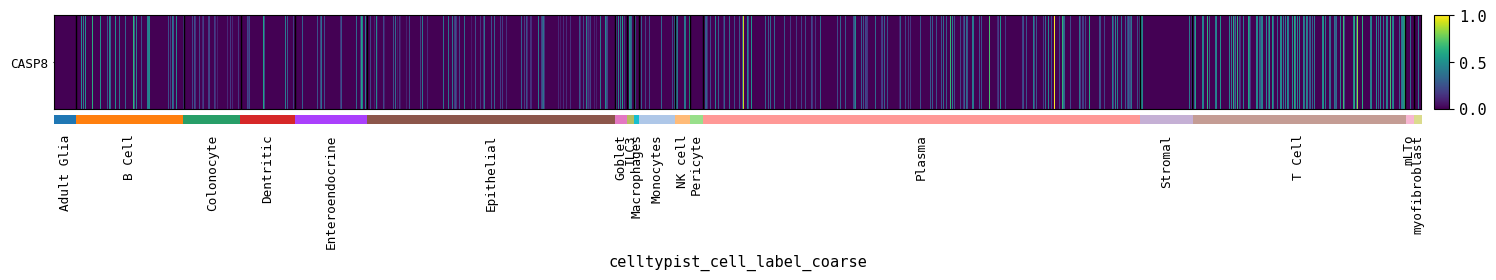

In [18]:
sc.pl.heatmap(adata, markers, groupby='celltypist_cell_label_coarse', swap_axes=True, figsize=(18,1.5), layer='log_norm', standard_scale='var')

In [19]:
def plot_per_cell_type(adata, cell_type, layer='log_norm'):
        data = adata[:, GOI]
        df = data.to_df(layer=layer)
        df['cell_type'] = data.obs['celltypist_cell_label_coarse']
        df['sample'] = data.obs['sampleID']

        df_cell = df[df['cell_type'] == cell_type]
        df_cell['cell_type'] = df_cell['cell_type'].cat.remove_unused_categories()

        # Create a catplot with box plots, small space between boxes
        plot = sns.catplot(data=df_cell, x='cell_type', y=GOI, hue='sample', kind='box', height=5, aspect=0.999)

        # Adjust the figure layout
        plot.fig.subplots_adjust(top=0.9)
        plot.fig.suptitle(str(GOI) + " Expression Across " + cell_type)

        # Calculate non-zero counts per sample
        non_zero_counts_per_sample = df_cell.groupby('sample')[GOI].apply(lambda x: (x != 0).sum())

        # Add legend with hue color and non-zero counts per sample
        handles, labels = plot._legend_data.values(), non_zero_counts_per_sample.values
        plot.ax.legend(handles, labels, title='Non-zero Counts', loc='lower left', bbox_to_anchor=(1, 0.7))

        # Show the plot
        plt.show()

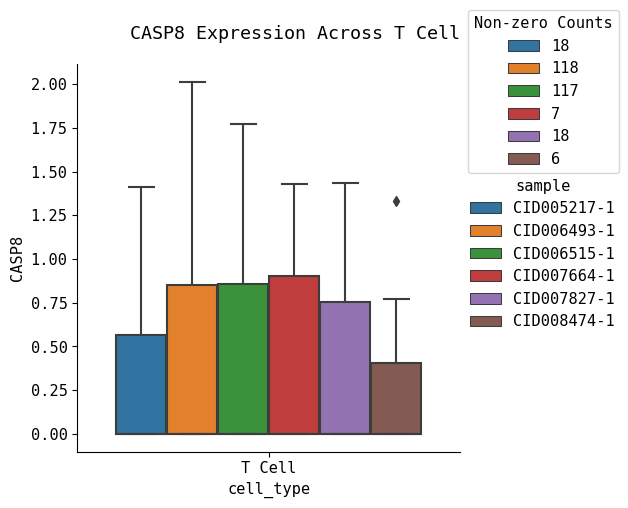

In [20]:
# GOI expression across samples (patients) with extra info on non-zero counts per patient
plot_per_cell_type(adata, cell_type='T Cell')

In [15]:
adata.to_df(layer='log_norm')

index,AL669831.5,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,AL645608.7,HES4,ISG15,...,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC004556.1,AC233755.2,AC233755.1,AC240274.1
CID005217-1-AACAGGGGTGAATGAT,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.463760,2.033968,...,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
CID005217-1-AACCAACGTCATCGCG,0.697436,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2.204836,1.104327,...,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
CID005217-1-AACCACAAGAGGCCAT,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
CID005217-1-AACCTTTAGCTCGGCT,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.466735,0.981152,...,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
CID005217-1-AACGAAATCCAAAGGG,0.000000,0.000000,0.0,0.0,1.004203,0.0,0.0,0.000000,0.000000,1.822804,...,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID008474-1-TTTGATCGTGCCGGTT,0.000000,0.000000,0.0,0.0,0.684229,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
CID008474-1-TTTGGAGGTCGATGCC,0.000000,0.000000,0.0,0.0,0.458188,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
CID008474-1-TTTGGTTCATTCTCCG,0.000000,0.243684,0.0,0.0,0.000000,0.0,0.0,0.243684,0.243684,0.000000,...,0.0,0.00000,0.00000,0.0,0.0,0.243684,0.0,0.0,0.0,0.243684
CID008474-1-TTTGGTTTCCGAACGC,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.293832,0.413657,0.000000,...,0.0,0.15767,0.15767,0.0,0.0,0.157670,0.0,0.0,0.0,0.000000


In [11]:
# for cell type: mean expression of a gene (x) vs. percentace of cells where this gene is detected (y) (wihtin a cell type)

def pl_expression_vs_detection(adata, cell_type=None, layer='log_norm', col='log1p(means)', ax=None, return_df = False):
    
    title=str(GOI)
    if cell_type != None:
        title = str("Overall expression in " + cell_type + " cells")
        if cell_type in adata.obs['celltypist_cell_label_coarse'].unique():
            adata = adata[adata.obs['celltypist_cell_label_coarse'] == cell_type]
        elif cell_type in adata.obs['celltypist_cell_label'].unique():
            adata = adata[adata.obs['celltypist_cell_label'] == cell_type]
        else:
            print("Cell type not found. Please check spelling.")
            return
    else:
        title = "All cell types"
        
    df = make_df(adata, col, layer=layer)

    # calculate percentage of cells (of the given cell type) where each gene is detected
    subset_df = adata.to_df(layer=layer)
    #nonzero_detected = pd.DataFrame(subset_df.astype(bool).sum(axis=0) / len(df) * 100, columns=['percent_detected'])
    nonzero_detected = pd.DataFrame(np.count_nonzero(subset_df, axis=0) / len(subset_df)*100, columns=['percent_detected'], index=subset_df.columns)
    df = df.join(nonzero_detected, how='left').sort_values(['gene_num'], ascending=True)
    if return_df:
        return df
        
    # plot mean expression of a gene (x) vs. percentage of cells where this gene is detected (y)
    ax = sns.scatterplot(data=df, x=col, y='percent_detected', hue='expr_class', linewidth=0)
    ax.set_title(str(title+ ": mean expression vs. percentage detected"))
    ax.legend(title='Expression Class', loc='lower left', bbox_to_anchor=(1, 0))

    annotation = str(GOI)
    highlight_y = df.loc[df.index == GOI]['percent_detected']
    highlight_x = df.loc[df.index == GOI][col]
    ax.scatter(highlight_x, highlight_y, color = 'yellow', linewidth=1)
    props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
    ax.annotate(annotation, (highlight_x, highlight_y), (highlight_x-0.1, highlight_y+20), arrowprops=props)
    plt.show()
    return ax


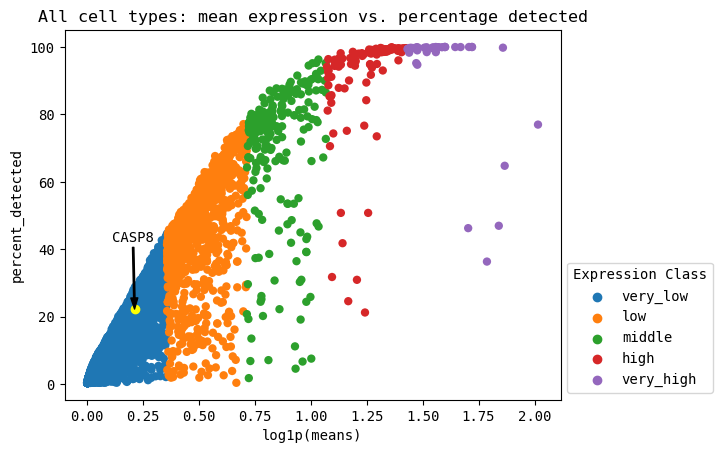

<Axes: title={'center': 'All cell types: mean expression vs. percentage detected'}, xlabel='log1p(means)', ylabel='percent_detected'>

In [14]:
pl_expression_vs_detection(adata)
# very interesting!! 

### Fit curve to the max curve seen above to calculate threshold for lower genes, curve elbow, etc. 

In [23]:
# make bins and take maximum of each bin to get (x,y) points to fit sigmoid curve to
df = pl_expression_vs_detection(adata, cell_type='Plasma', return_df=True)
df['percent_detected'] = df['percent_detected']/100
df_bins = df.groupby(pd.cut(df['log1p(means)'], np.arange(0, max(df['log1p(means)']), 0.05))).max() 
#TODO issue here that the log1p(means) value is also always the max, as in the very top of the bin instead of the median for example? 
df_bins = df_bins.dropna()
# fit function here
xdata = df_bins['log1p(means)'].values
ydata = df_bins['percent_detected']
for bin, value in ydata.items():
    if (bin.right > 1.25) and (value < 0.7):
        ydata.loc[bin] = 0.999
ydata = ydata.values
df_bins.tail()

,n_cells,highly_variable,means,dispersions,dispersions_norm,gene_num,log(means),log1p(means),expr_class,percent_detected
log1p(means),,,,,,,,,,
"(1.6, 1.65]",5397.0,0.0,4.122572,3.131673,0.809077,16711.0,1.416477,1.633657,very_high,1.000000
"(1.65, 1.7]",5395.0,0.0,4.305445,3.352774,1.000000,16712.0,1.459881,1.668734,very_high,1.000000
"(1.85, 1.9]",5385.0,0.0,5.611379,4.798494,0.707107,16714.0,1.724797,1.888792,very_high,0.998842
"(1.95, 2.0]",1962.0,0.0,6.082448,7.967224,1.000000,16715.0,1.805407,1.957620,very_high,0.999000
"(2.0, 2.05]",3495.0,0.0,6.587778,7.942641,1.000000,16717.0,1.885216,2.026539,very_high,0.982629


In [27]:
# fit and plot splines
tck = splrep(xdata, ydata, s=0.0009, k=3)
tck_s = splrep(xdata, ydata, s=len(xdata))

# derivatives of spline function
yders = interpolate.spalde(xdata, tck)
yders_df = pd.DataFrame(yders, columns=['y', 'dy', 'd2y', 'd3y'], index= xdata)
yders_df['d3y_diff'] = yders_df['d3y'].diff().fillna(0)
# identify any changes in direction of the third derivative
infls = yders_df[yders_df['d3y_diff'] != 0].index
infls

Index([0.4975267605816357, 0.9467385443893931, 1.384571200389861], dtype='float64')

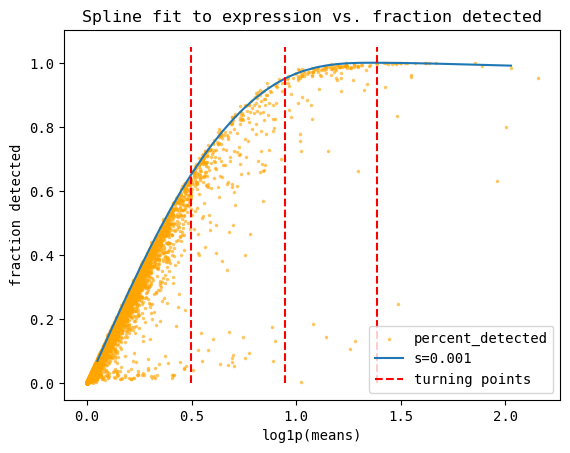

In [28]:
# plot data vs fitted spline with inflection points
fig, ax2 = plt.subplots(1,1)
ax2.scatter(data=df, x='log1p(means)', y='percent_detected', alpha=0.5, color='orange', s=2.5)
ax2.plot(xdata, BSpline(*tck)(xdata), label='s=0.001')
#ax2.plot(xdata, BSpline(*tck_s)(xdata), label=f's={len(xdata)}')
ax2.set_title("Spline fit to expression vs. fraction detected")
ax2.set_xlabel("log1p(means)")
ax2.set_ylabel("fraction detected")
ax2.vlines(infls, 0, 1.05, color='red', linestyles='dashed', label='turning points')
ax2.legend()
plt.show()

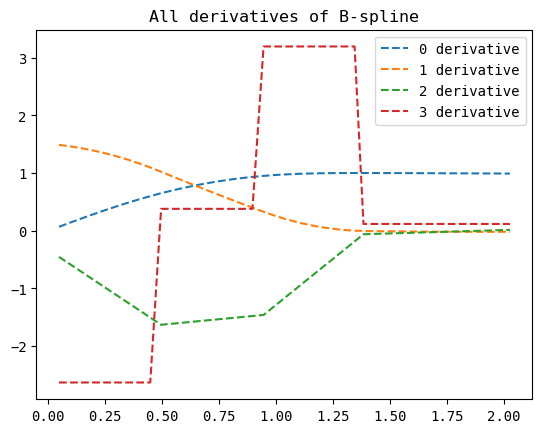

In [29]:
# second derivative of spline function
yders = interpolate.spalde(xdata, tck)
plt.figure()
for i in range(4):
   plt.plot(xdata, [d[i] for d in yders], '--', label=f"{i} derivative")
plt.legend()
plt.title('All derivatives of B-spline')
plt.show()

### Automatically identify lower outliers (clue to look at celltype subset)

In [30]:
# calculate the orthogonal distance of each point (gene) from the spline
# if greater than a certain value (threshold), then it is an outlier

# calculate the distance of each point from the linear interpolation of its respective section
def calc_distance_point(point, p1, p2):
    x0, y0 = point
    x1, y1 = p1
    x2, y2 = p2
    return abs((x2-x1)*(y1-y0) - (x1-x0)*(y2-y1)) / math.sqrt((y2-y1)**2 + (x2-x1)**2) # orthogonal distance formula

def calc_distance(x, y, inflection=infls):
    # make  linear interpolations of the sigmoid function, eg. one from 0 to inflection point, one from inflection point to max

    lowest = [0,0]
    highest = [x[-1], BSpline(*tck)(x[-1])]
    
    distance = []
    complete_data = pd.DataFrame(data={'x': x.values, 'y': y.values})
    segment = complete_data[complete_data['x'] < inflection[0]]


    for i, j in zip(segment['x'], segment['y']):
        distance.append(calc_distance_point([i,j], lowest, [inflection[0], BSpline(*tck)(inflection[0])]))

    for infls in range(len(inflection)-1):
        segment = complete_data[(complete_data['x'] >= inflection[infls]) & (complete_data['x'] < inflection[infls+1])]
        for i, j in zip(segment['x'], segment['y']):
            distance.append(calc_distance_point([i,j], [inflection[infls], BSpline(*tck)(inflection[infls])], [inflection[infls+1], BSpline(*tck)(inflection[infls+1])]))
    
    segment = complete_data[(complete_data['x'] >= inflection[-1])]
    for i, j in zip(segment['x'], segment['y']):
        distance.append(calc_distance_point([i,j], [inflection[-1], BSpline(*tck)(inflection[-1])], highest))

    return distance
    

detecter = df[['log1p(means)', 'percent_detected']]
detecter['distance'] = calc_distance(detecter['log1p(means)'], detecter['percent_detected'])
detecter['is_outlier'] = detecter['distance'] > 0.15
detecter

,log1p(means),percent_detected,distance,is_outlier
index,,,,
LINC02323,1.000000e-12,0.000000,7.943924e-13,False
FAM3D-AS1,1.000000e-12,0.000000,7.943924e-13,False
SIGLEC14,1.000000e-12,0.000000,7.943924e-13,False
AFF2,1.000000e-12,0.000000,7.943924e-13,False
SLITRK2,1.000000e-12,0.000000,7.943924e-13,False
...,...,...,...,...
JCHAIN,1.888792e+00,0.989577,3.704576e-03,False
IGLC3,1.957620e+00,0.632310,3.599460e-01,True
IGLC2,2.004694e+00,0.798494,1.931028e-01,True


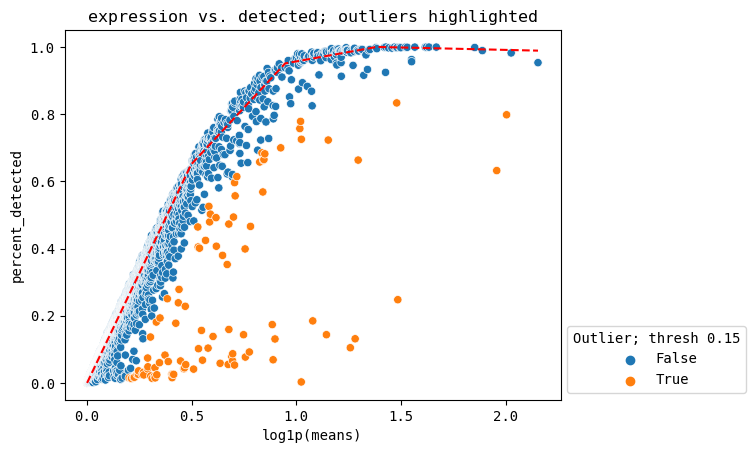

In [31]:
# make plot with outliers highlighted   
mask = detecter['log1p(means)'].isin(infls)
inflections = detecter[mask]
inflections['spline'] = BSpline(*tck)(inflections['log1p(means)'])
inflections['log1p(means)'][0]

fig, ax = plt.subplots(1,1)
sns.scatterplot(data=detecter, x='log1p(means)', y='percent_detected', hue='is_outlier', alpha=1, ax=ax)
ax.plot([0, inflections['log1p(means)'][0], inflections['log1p(means)'][1], inflections['log1p(means)'][2], detecter['log1p(means)'][-1]], 
        [0, inflections['spline'][0], inflections['spline'][1], inflections['spline'][2], BSpline(*tck)(detecter['log1p(means)'][-1])], color='red', linestyle='dashed')
ax.set_title("expression vs. detected; outliers highlighted")
ax.legend(title='Outlier; thresh 0.15', loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

## Summarize expression vs. percent detected information in text output

In [ ]:
# method to summarize expression vs. percentage detected for GOI
# location on the curve: above or below inflection point, a.k.a are dropouts expected or not
# steepness of the curve: how quickly does the gene go from not detected to detected
# if the GOI is a lower outlier or not: a.k.a hint to look into cell type subsets

def summarize_expression_vs_detection(adata, GOI, cell_type=None, layer='log_norm', col='log1p(means)', ax=None):
    summary = ""
    # TODO

    return summary

## Extras 

In [32]:
# function to plot relationship between total counts mean and percent detected value
# x: cell type specific total counts mean, y: cell type specific percent detected value 

def pl_tc_vs_pd(adata, ax, method='mean', return_df = False, layer='log_norm'):

    # calculate mean total counts per cell type
    subset_df = adata.to_df(layer='log_norm')
    means = adata.obs.groupby(['celltypist_cell_label']).mean()
    new_df = pd.DataFrame(data=means['total_counts']) #df with cell type as index and mean 'total_counts' as column

    temp = {}
    # calculate percentage of cells (per cell type) where each gene is detected (average)
    for cell_type in adata.obs['celltypist_cell_label'].unique():
        subset = subset_df[adata.obs['celltypist_cell_label'] == cell_type]
        nonzero_detected = pd.DataFrame(np.count_nonzero(subset, axis=0) / len(subset)*100, columns=[cell_type], index=subset.columns)
        if method=='median':
            temp[cell_type] = nonzero_detected[cell_type].median()
        else:
            temp[cell_type] = nonzero_detected[cell_type].mean()

    new_df['percent_detected'] = new_df.index.map(temp)
    new_df = new_df.sort_values(['total_counts'], ascending=True)
    if return_df:
        return new_df
    
    # plot new_df: x=total_counts, y=percent_detected
    for row, column in new_df.iterrows():
        ax.scatter(column['total_counts'], column['percent_detected'], c=np.random.rand(1, 3), label=row) 
        ax.annotate(row, (column['total_counts'], column['percent_detected']), (column['total_counts']+100, column['percent_detected']+0.1), fontsize=6.5)

    ax.set_title("Mean total counts vs. mean percent detected, per cell type")
    ax.set_xlabel("Mean total counts")
    ax.set_ylabel(str(method + " percent non-zero"))
    
    return ax

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1 = pl_tc_vs_pd(adata, ax=ax1, method='median')
plt.show()
# TODO look online for cell size estimates for each cell type and compare to total counts? 

In [127]:
# function to plot histogram for given adata layer
def clean_data(adata, layer_name, threshold = 99.75, remove_zeros = False):
    df = adata.to_df(layer=layer_name)
    data = df.to_numpy().flatten()
    
    cutoff = np.percentile(df.values, threshold)
    if remove_zeros:
        data = data[data != 0]
    data = data[data <= cutoff]
    
    return data
    

def plot_hist(adata, ax, layer_name, bin_num=1000): # higher bin numbers made zeros in tc_norm_log disappear? 
    data = clean_data(adata, layer_name)
    
    hist, edges = np.histogram(data, bins=bin_num)

    ax.bar(edges[:-1], hist, width = max(edges)/bin_num, color='#0504aa', align='edge')
    ax.set_title(layer_name)
    ax.set_xlim(min(edges), np.percentile(data, 99.75))
    ax.set_ylim(0, np.percentile(hist, 99.75))
    ax.grid(axis='y', alpha=0.75)
    ax.set_xlabel('Gene Expression')
    ax.set_ylabel('Frequency')
    ax.vlines(np.percentile(data, 97.5), ymin=0, ymax=max(hist), linestyle="--", color="r", label='97.5%')
        
    ax.legend()
    
    return ax

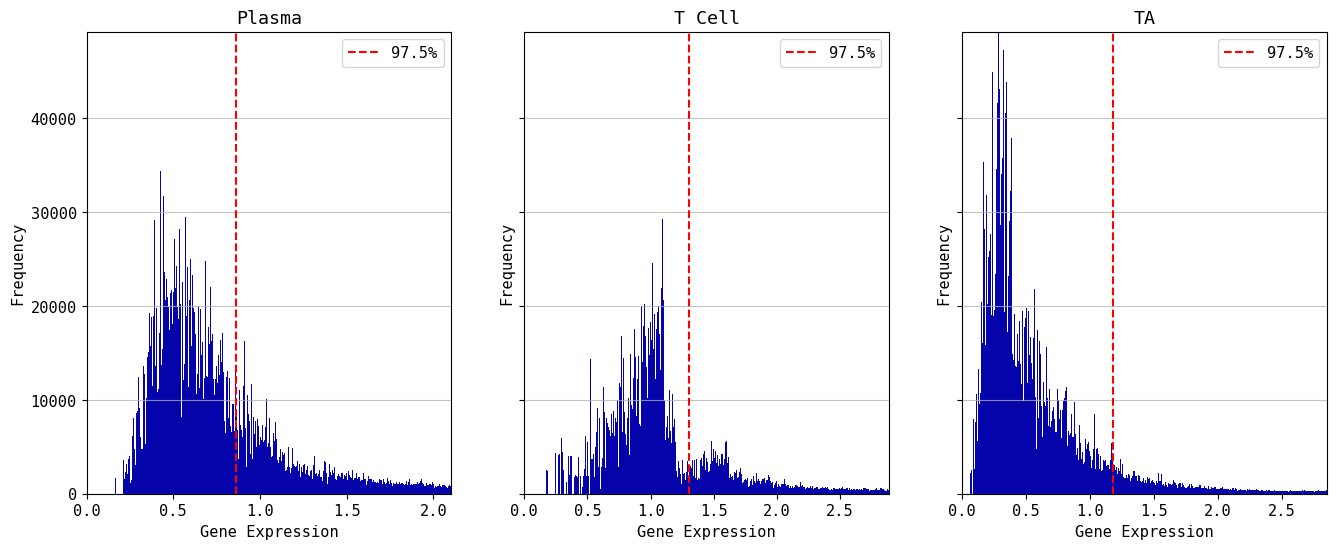

In [129]:
fig, (ax2, ax3, ax4) = plt.subplots(1,3, figsize=(16,6), sharey=True)
ax2 = plot_hist(adata[adata.obs['celltypist_cell_label_coarse'] == 'Plasma'], ax=ax2, layer_name='log_norm', bin_num=500)
ax2.set_title("Plasma")
ax3 = plot_hist(adata[adata.obs['celltypist_cell_label_coarse'] == 'T Cell'], ax=ax3, layer_name='log_norm', bin_num=500)
ax3.set_title("T Cell")
ax4 = plot_hist(adata[adata.obs['celltypist_cell_label'] == 'TA'], ax=ax4, layer_name='log_norm', bin_num=500)
ax4.set_title("TA")
plt.show()

In [91]:
# function to calculate the percent change between two layers (e.g. log_norm and magic)
def calculate_percent_change(adata, layer1, layer2, type='value'):
    df1 = adata.to_df(layer=layer1)
    df2 = adata.to_df(layer=layer2)
    
    nonzero_detected = pd.DataFrame(np.count_nonzero(df1, axis=0), columns=['df1_nonzero'], index=df1.columns)
    nonzero_detected['df2_nonzero'] = np.count_nonzero(df2, axis=0)
    if type == 'value':
        # calculate percent change of all values (including 0s)
        nonzero_detected['percent_change'] = (nonzero_detected['df2_nonzero'] - nonzero_detected['df1_nonzero']) / nonzero_detected['df1_nonzero'] * 100
    elif type=='nonzero':
        # calculate percentage of the number of values that changed from 0 to non-zero
        nonzero_detected['percent_change'] = (nonzero_detected['df2_nonzero'] - nonzero_detected['df1_nonzero']) / len(df1) * 100
    nonzero_detected['percent_change'] = nonzero_detected['percent_change'].fillna(0)
    return nonzero_detected

# function to plot the percent change between two layers (e.g. log_norm and magic)
def plot_percent_change(adata, layer1, layer2, cell_type, type='value', col='log1p(means)'):
    title=str(GOI)
    if cell_type != None:
        title = str("Overall expression in " + cell_type + " cells")
        if cell_type in adata.obs['celltypist_cell_label_coarse'].unique():
            adata = adata[adata.obs['celltypist_cell_label_coarse'] == cell_type]
        elif cell_type in adata.obs['celltypist_cell_label'].unique():
            adata = adata[adata.obs['celltypist_cell_label'] == cell_type]
        else:
            print("Cell type not found. Please check spelling.")
            return
    else:
        title = "All cell types"
        
    df = make_df(adata, col, layer=layer1)

    changes = calculate_percent_change(adata, layer1, layer2, type=type)
    df = df.join(changes, how='left').sort_values(['gene_num'], ascending=True)
        
    # plot mean expression of a gene (x) vs. percentage of cells where this gene is detected (y)
    ax = sns.scatterplot(data=df, x=col, y='percent_change', hue='expr_class', linewidth=0)
    ax.set_title(str(title + ": Expression vs. Change in Detection"))
    ax.legend(title='Expression Class', loc='lower left', bbox_to_anchor=(1, 0))
    plt.show()
    return ax